In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from io import StringIO
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics

## Data Wragging

In [2]:
df = pd.read_csv("us-counties-2020.csv")
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [3]:
print(df['deaths'])

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
884732    16.0
884733     4.0
884734     7.0
884735    19.0
884736     2.0
Name: deaths, Length: 884737, dtype: float64


In [4]:
df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [5]:
df.isnull().sum()

date          0
county        0
state         0
fips       8266
cases         0
deaths    18761
dtype: int64

In [6]:
df = df.dropna()

df.isnull().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [7]:
df.columns.values.tolist()

['date', 'county', 'state', 'fips', 'cases', 'deaths']

In [8]:
# list_features = ['cases']
# x = df[df['state'] == "California"][list_features]
# y = df[df['state'] == "California"]['deaths']
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=7)

## Linear Regression

### Explore the relation between cases - deaths 

reference : https://realpython.com/linear-regression-in-python/

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [10]:
print(df['deaths'].min())

0.0


### Prepare data

In [11]:
# Use data of Orange to show off the relation between cases and deaths
X = df[df['state'] == "California"]['cases']

print(X)

5             1
9             1
10            1
14            1
15            1
          ...  
881731    33443
881732     2962
881733    39559
881734     8238
881735     3898
Name: cases, Length: 16792, dtype: int64


In [12]:
# transfer dataframe to a 1-D array to fit the format of Linear Regression Module
X = X.values.reshape(-1,1)

Y = df[df['state'] == "California"]['deaths']
Y.values.reshape(-1,1)

array([[  0.],
       [  0.],
       [  0.],
       ...,
       [263.],
       [111.],
       [ 19.]])

In [13]:
print(X)

[[    1]
 [    1]
 [    1]
 ...
 [39559]
 [ 8238]
 [ 3898]]


In [14]:
print(Y)

5           0.0
9           0.0
10          0.0
14          0.0
15          0.0
          ...  
881731    406.0
881732     21.0
881733    263.0
881734    111.0
881735     19.0
Name: deaths, Length: 16792, dtype: float64


### Create the Linear Regression Module

In [15]:
model = LinearRegression()
model = model.fit(X, Y)

print(model)

LinearRegression()


In [16]:
r_sq = model.score(X, Y)

print('coefficient of determination(𝑅²) :', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination(𝑅²) : 0.9150969390843606
intercept: -6.95199985456145
slope: [0.01818519]


### Predict the result 

Here Y can be predicted by 2797 + x * -0.02903428 

In [17]:
y_pred = model.predict(X)

print('predicted response:', y_pred, sep='\n')

predicted response:
[ -6.93381467  -6.93381467  -6.93381467 ... 712.43579551 142.85756708
  63.93385738]


In [18]:
print(np.max(Y,axis=0))

10345.0


###  Visualize the predicted results and the actual results

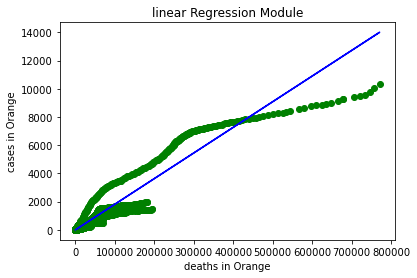

In [19]:
import matplotlib.pyplot as plt
import numpy as np
 
plt.title("linear Regression Module")
plt.xlabel('deaths in Orange')
plt.ylabel('cases in Orange')

plt.plot(X, y_pred, color='blue')
plt.scatter(X, Y, color='green')
 
plt.show() 

### Use OLS to evaluate the module 

In [20]:
X = df[df['state'] == "California"]['cases']
Y = df[df['state'] == "California"]['deaths']
 
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.810e+05
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:32:49   Log-Likelihood:            -1.1376e+05
No. Observations:               16792   AIC:                         2.275e+05
Df Residuals:                   16790   BIC:                         2.275e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9520      1.694     -4.104      0.0

The R-squared is 0.915, which is closer to 1. It means 'cases' and 'deaths' have strong relations.

The p valus is 0, which is less than 0.05. It indicates 'cases' are significant.

## Multiple Linear Regression

### Explore the relation between cases, fips - deaths

In [21]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


### Prepare data

In [22]:
X_multi = df[df['state'] == "California"][['cases', 'fips']]

print(X_multi)

        cases    fips
5           1  6059.0
9           1  6037.0
10          1  6059.0
14          1  6037.0
15          1  6059.0
...       ...     ...
881731  33443  6107.0
881732   2962  6109.0
881733  39559  6111.0
881734   8238  6113.0
881735   3898  6115.0

[16792 rows x 2 columns]


In [23]:
Y_multi = df[df['state'] == "California"]['deaths']
Y_multi.values.reshape(-1,1)

array([[  0.],
       [  0.],
       [  0.],
       ...,
       [263.],
       [111.],
       [ 19.]])

### Create the Multiple Linear Regression Module

In [24]:
model = LinearRegression()
model = model.fit(X_multi, Y_multi)

print(model)

LinearRegression()


In [25]:
r_sq = model.score(X_multi, Y_multi)

print('coefficient of determination(𝑅²) :', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination(𝑅²) : 0.9153000063328857
intercept: 1874.5550459780345
slope: [ 0.01817415 -0.31055228]


### Predict the result

In [26]:
Y_multi_pred = model.predict(X_multi)

print('predicted response:', Y_multi_pred, sep='\n')

predicted response:
[-7.06305729e+00 -2.30907087e-01 -7.06305729e+00 ...  6.95721241e+02
  1.25867591e+02  4.63706766e+01]


###  Use OLA to evaluate the module 

In [27]:
X = df[df['county'] == "Orange"][['cases', 'fips']]
Y = df[df['county'] == "Orange"]['deaths']
 
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     7598.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:32:49   Log-Likelihood:                -14778.
No. Observations:                2354   AIC:                         2.956e+04
Df Residuals:                    2351   BIC:                         2.958e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2341      7.166      5.057      0.0

The R-squared is 0.866, which is closer to 1. It means 'cases', 'fips' and 'deaths' have strong relations.

The p value of 'cases' if 0, which indicates 'cases' has strong relation with 'deaths'. However, the p value of 'fips' is 0.177, which is larger than 0.05, so we do not reject the null hypothesis.